# Hierarchical clustering with 2D toy datasets
***
- 將階層式聚類套用在 2D 樣板資料上, 來觀察幾種不同參數的結果有何不同

In [1]:
# 載入套件
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [2]:
# 設定 2D 樣板資料
n_samples = 1500
random_state = 777

noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

In [3]:
# 設定群集與繪圖參數
plt.figure(figsize=(10, 8))
plot_num = 1
default_base = {'n_neighbors': 10, 'n_clusters': 3}
datasets = [(noisy_moons, {'n_clusters': 2}), (blobs, {'n_clusters': 2}), (no_structure, {'n_clusters': 2})]

<Figure size 720x576 with 0 Axes>

# 作業
* 試著完成剩下三種 2D 樣板資料的繪圖, 並觀察有何不同

0 

(array([[ 1.2430603 , -0.39971553],
       [-0.84593301,  0.38341907],
       [-0.93193478,  0.41675693],
       ...,
       [ 0.79447244, -0.4390588 ],
       [ 1.87892589, -0.08749029],
       [ 0.26241765, -0.25397065]]), array([1, 0, 0, ..., 1, 1, 1], dtype=int64)) 

{'n_clusters': 2} 

{'n_neighbors': 10, 'n_clusters': 3} 

{'n_neighbors': 10, 'n_clusters': 2} 

1 

(array([[ 5.86749807,  8.17715188],
       [ 5.61369982,  9.93295527],
       [ 7.22508428, 10.44886194],
       ...,
       [ 7.73674097, 10.82855388],
       [-4.61701094, -9.64855983],
       [-3.48640175, -9.25766922]]), array([0, 0, 0, ..., 0, 2, 2])) 

{'n_clusters': 2} 

{'n_neighbors': 10, 'n_clusters': 3} 

{'n_neighbors': 10, 'n_clusters': 2} 

2 

(array([[0.53384643, 0.22343554],
       [0.61914419, 0.51786599],
       [0.25452759, 0.28694974],
       ...,
       [0.51721991, 0.59516955],
       [0.18117222, 0.3483636 ],
       [0.6016765 , 0.99174636]]), None) 

{'n_clusters': 2} 

{'n_neighbors': 10, 

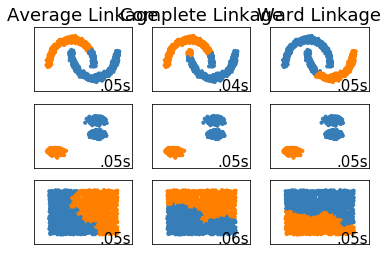

In [4]:
# 執行各種樣板資料的繪圖迴圈

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    print(i_dataset,'\n')
    print(dataset,'\n')
    print(algo_params,'\n')
    
    # 複製參數與標準化
    params = default_base.copy()
    print(params,'\n')
    params.update(algo_params)  
    print(params,'\n')
    
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    # 設定三種不同參數的 Hierarchical clustering
    ward = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="ward")
    complete = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="complete")
    average = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="average")
    clustering_algorithms = (
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward))

    # 繪製三種圖形
    for name, algorithm in clustering_algorithms:
        # t0 / t1 : 紀錄時間差
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'), transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1
plt.show()